In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [273]:
data=pd.read_csv('./FineTech_appData.csv')
data

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,2013-05-09 13:46:17.871,3,13:00:00,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0
49996,169179,2013-04-09 00:05:17.823,1,00:00:00,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,0
49997,302367,2013-02-20 22:41:51.165,2,22:00:00,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,0
49998,324905,2013-04-28 12:33:04.288,6,12:00:00,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0


In [274]:
data['hour']=data['hour'].str.slice(0, 3).astype(int)

In [275]:
data_num = data.copy().drop(columns=['user', 'first_open', 'screen_list', 'enrolled', 'enrolled_date'])

In [276]:
data_num

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1
...,...,...,...,...,...,...,...
49995,3,13,32,13,0,0,0
49996,1,0,35,4,0,1,0
49997,2,22,39,25,0,0,0
49998,6,12,27,26,0,0,0


# Histogram

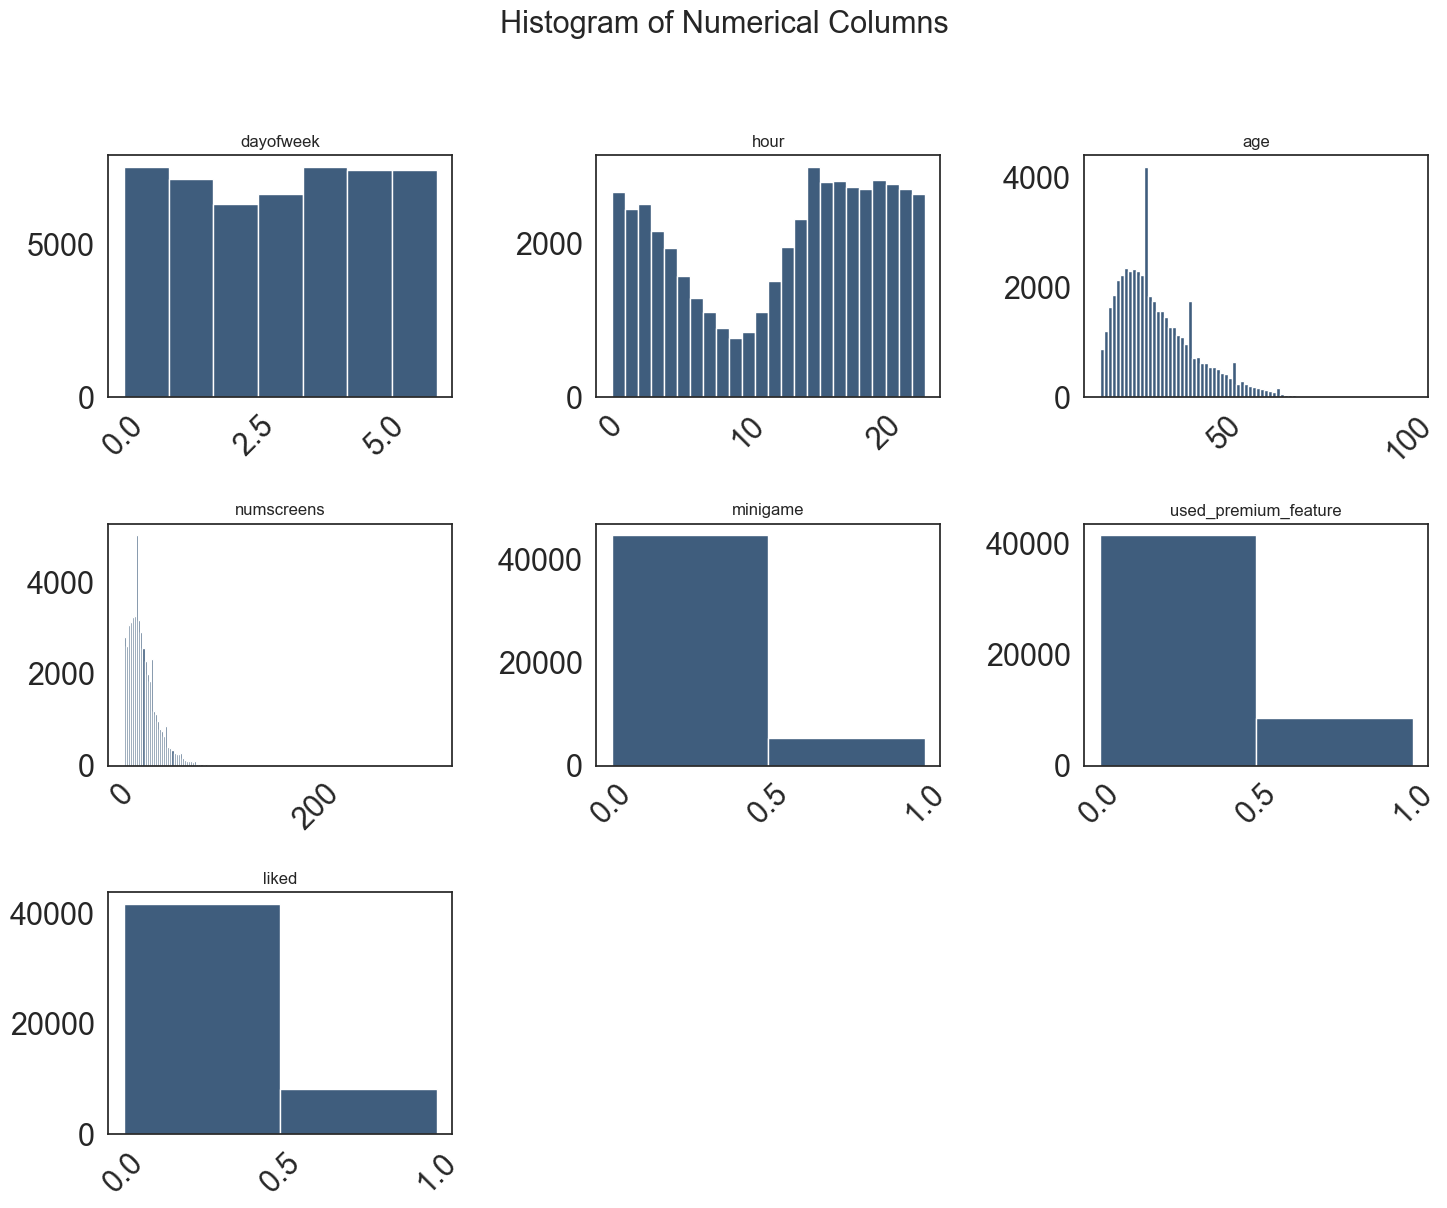

In [277]:
plt.figure(figsize=(15, 12))
plt.suptitle('Histogram of Numerical Columns', fontsize=22, y=1.02)

for i in range(1, data_num.shape[1] + 1):
    plt.subplot(3, 3, i)
    
    val=np.size(data_num.iloc[:, i-1].unique())
    plt.hist(data_num.iloc[:, i - 1], bins=val, color='#3F5D7D')
    
    col = data_num.columns[i - 1]
    plt.title(col, fontsize=12)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<Axes: title={'center': 'Corelation between response Varible'}>

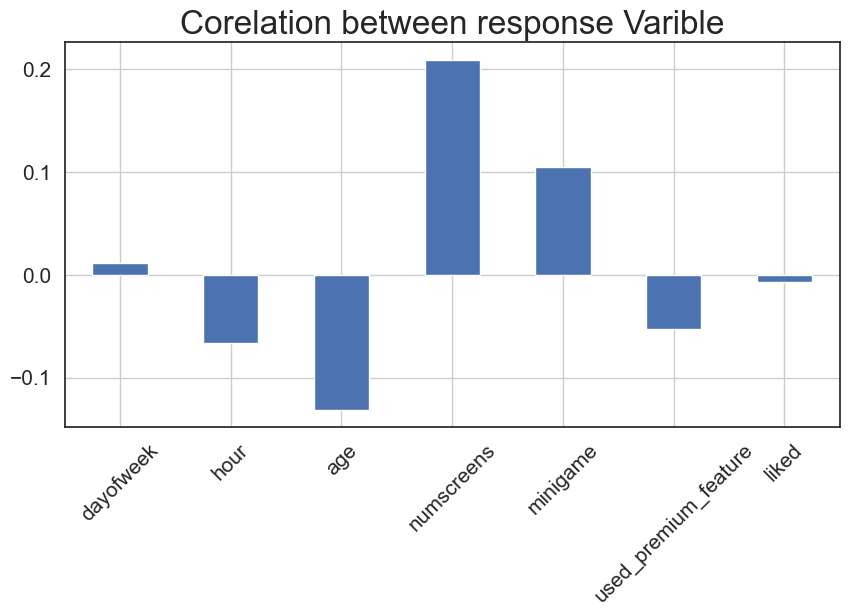

In [278]:
data_num.corrwith(data.enrolled).plot.bar(figsize=(10, 5),
    title='Corelation between response Varible',
    fontsize=15, rot=45,
    grid=True
)

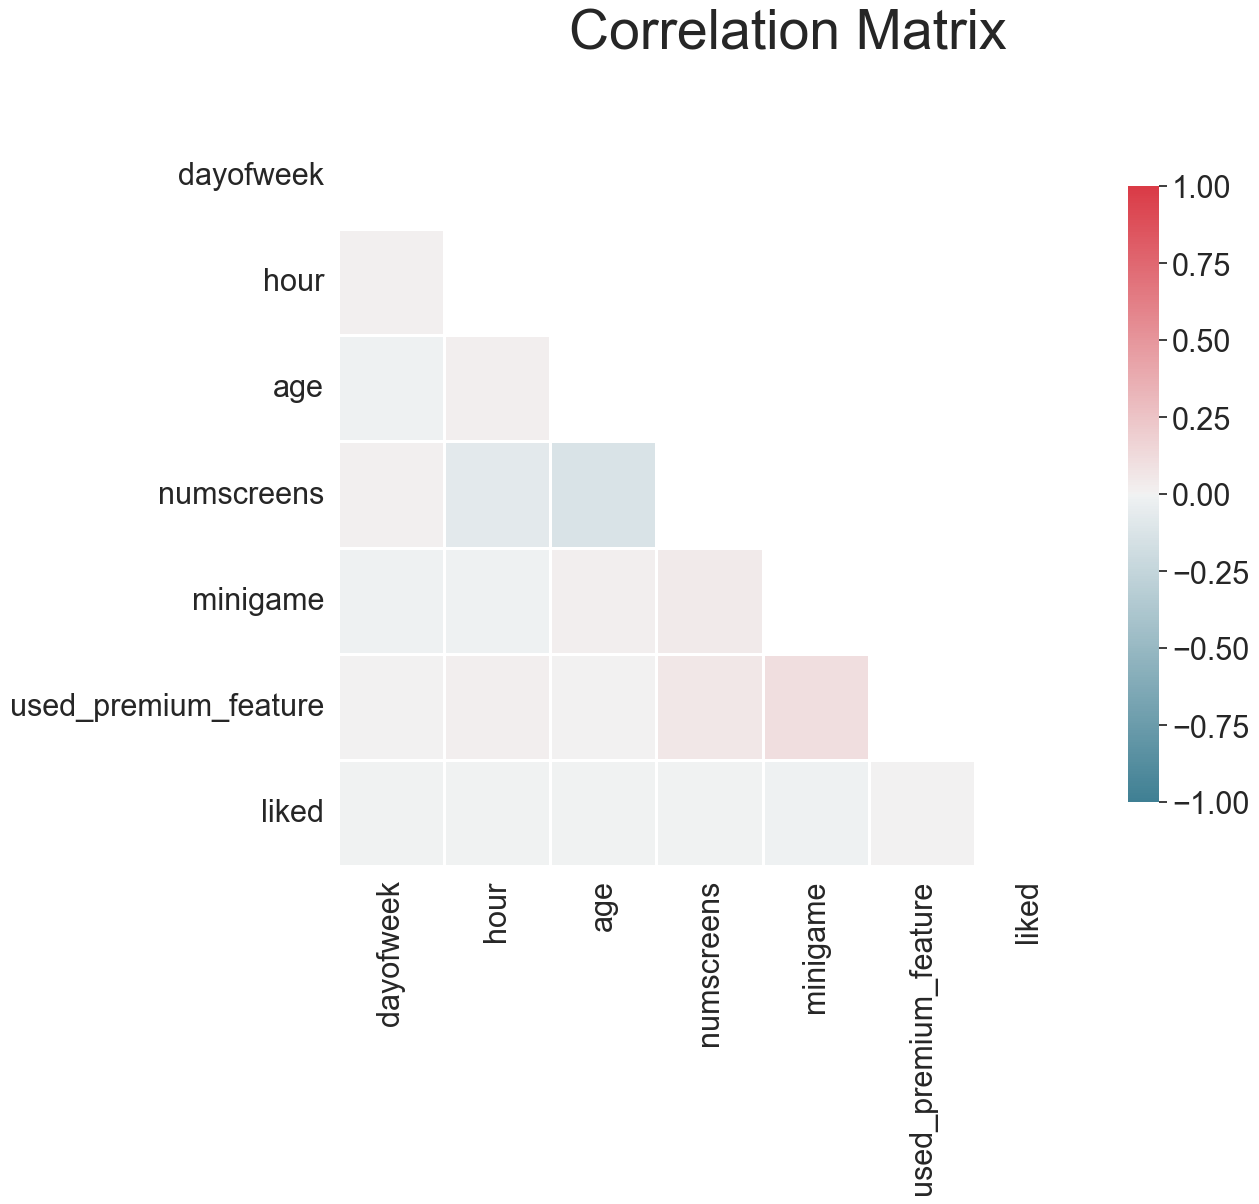

In [279]:
sns.set(style='white', font_scale=2)
corr = data_num.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(12, 10))
fig.suptitle("Correlation Matrix", fontsize=40)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmin=-1,
    vmax=1,
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8},
    ax=ax
)

plt.show()

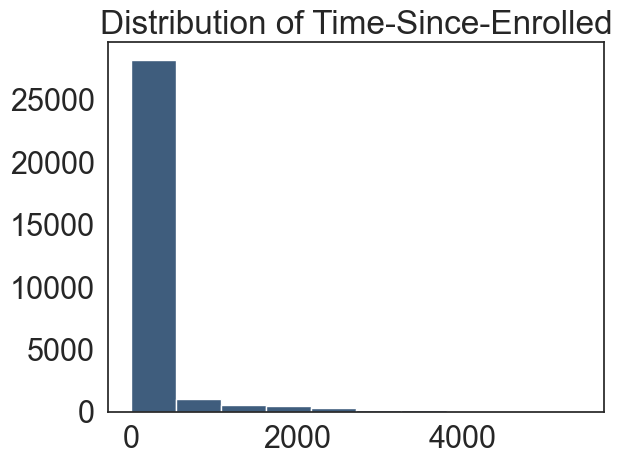

In [280]:
data['first_open']=[parser.parse(raw_data) for raw_data in data['first_open']]
data['enrolled_date']=[parser.parse(raw_data) if isinstance(raw_data, str) else raw_data for raw_data in data['enrolled_date']]

data['difference']=(data.enrolled_date - data.first_open).dt.total_seconds()/3600

plt.hist(
    data['difference'].dropna(),
    color='#3F5D7D',
)
plt.title('Distribution of Time-Since-Enrolled')
plt.show()

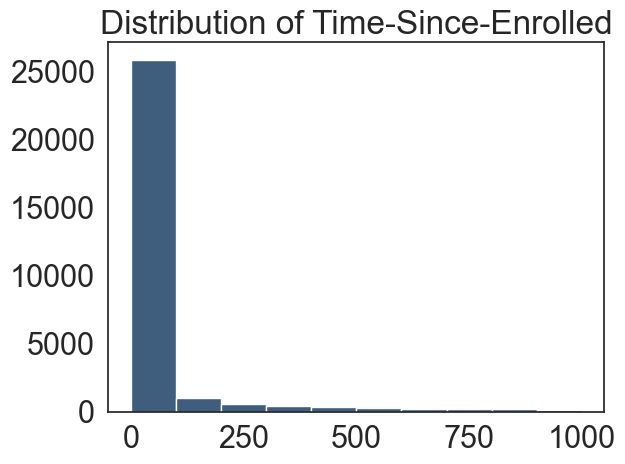

In [281]:
plt.hist(
    data['difference'].dropna(),
    color='#3F5D7D',
    range=(0, 1000)
)
plt.title('Distribution of Time-Since-Enrolled')
plt.show()

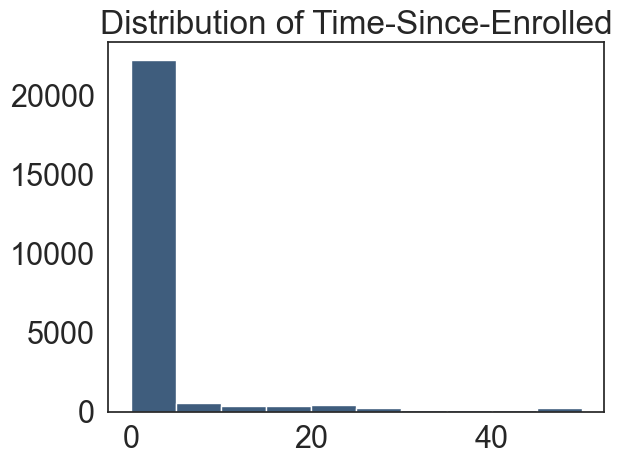

In [282]:
plt.hist(
    data['difference'].dropna(),
    color='#3F5D7D',
    range=(0, 50)
)
plt.title('Distribution of Time-Since-Enrolled')
plt.show()


In [283]:
data.loc[data['difference'] > 48, 'enrolled'] = 0
data.drop(columns=['first_open', 'enrolled_date', 'difference'])

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,0
49996,169179,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,0
49997,302367,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,0
49998,324905,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,0


In [284]:
topscreens=pd.read_csv('./top_screens.csv')
topscreens

,Unnamed: 0,top_screens
0,0,Loan2
1,1,location
2,2,Institutions
3,3,Credit3Container
4,4,VerifyPhone
5,5,BankVerification
6,6,VerifyDateOfBirth
7,7,ProfilePage
8,8,VerifyCountry
9,9,Cycle


In [285]:
topscreens=pd.read_csv('./top_screens.csv').top_screens.values
topscreens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)